## Exercise 1

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from skimage import io

def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap="gray", vmin=-200, vmax=500)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified, cmap="gray")
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

in_dir = 'data/'
in_file = 'ex6_ImagData2Load.mat'
data = sio.loadmat(in_dir + in_file)
ImgT1 = data['ImgT1']
ImgT2 = data['ImgT2']
ROI_GM = data['ROI_GM'].astype(bool)
ROI_WM = data['ROI_WM'].astype(bool)



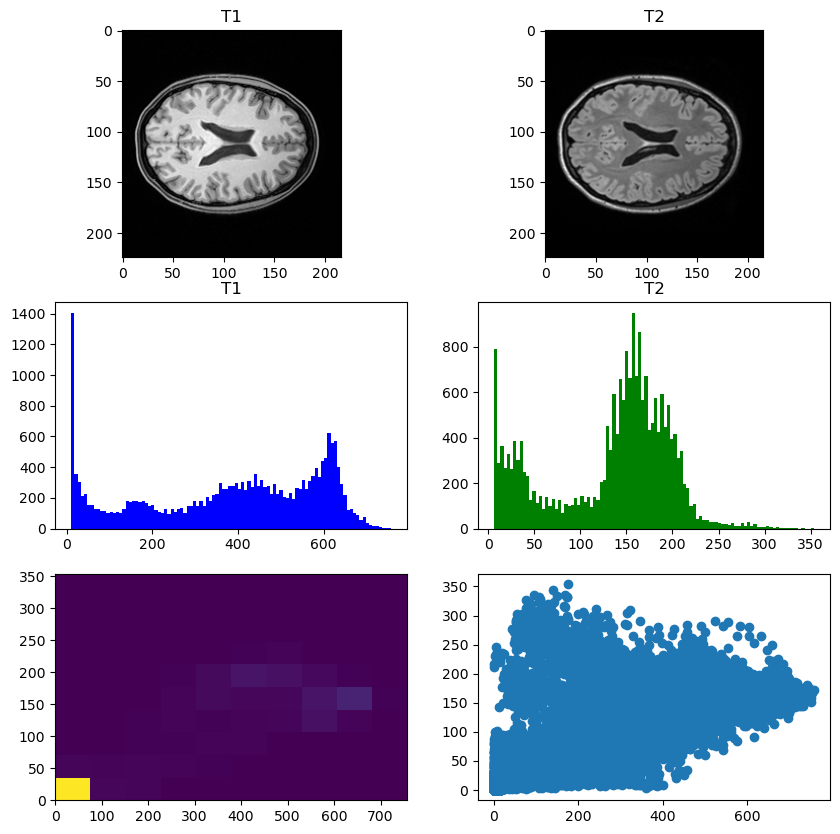

In [66]:

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs[0, 0].imshow(ImgT1, cmap='gray')
axs[0, 0].set_title('T1')
axs[0, 1].imshow(ImgT2, cmap='gray')
axs[0, 1].set_title('T2')
axs[1, 0].hist(ImgT1[ImgT1 > 10].ravel(), bins=100, color='blue')
axs[1, 0].set_title('T1')
axs[1, 1].hist(ImgT2[ImgT2 > 5].ravel(), bins=100, color='green')
axs[1, 1].set_title('T2')
axs[2, 0].hist2d(ImgT1.ravel(), ImgT2.ravel())
axs[2, 1].scatter(ImgT1, ImgT2)
io.show()

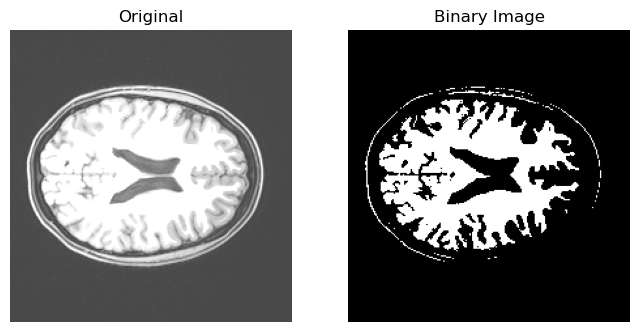

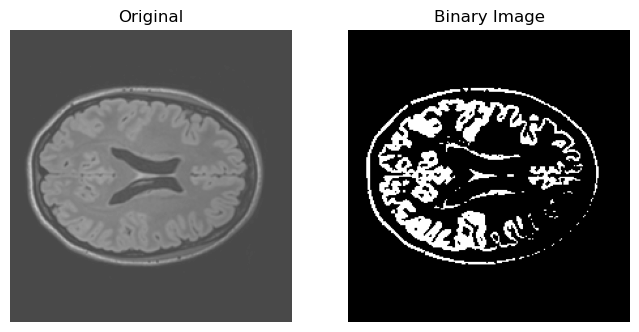

In [48]:
bin_img = ImgT1 > 450
show_comparison(ImgT1, bin_img, 'Binary Image')
bin_img = ImgT2 > 175
show_comparison(ImgT2, bin_img, 'Binary Image')

## Exercise 2

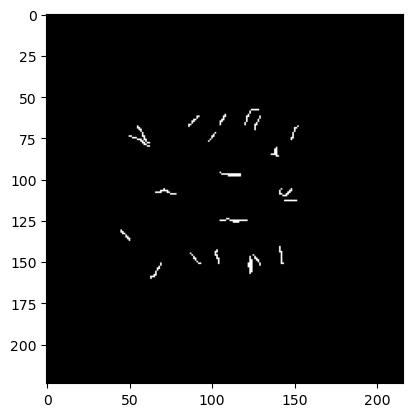

In [49]:
plt.imshow(ROI_GM, cmap='gray')

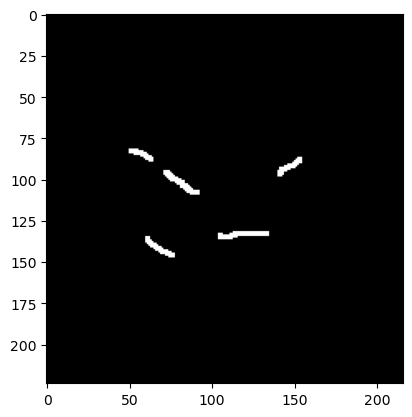

In [50]:
plt.imshow(ROI_WM, cmap='gray')

## Exercise 3

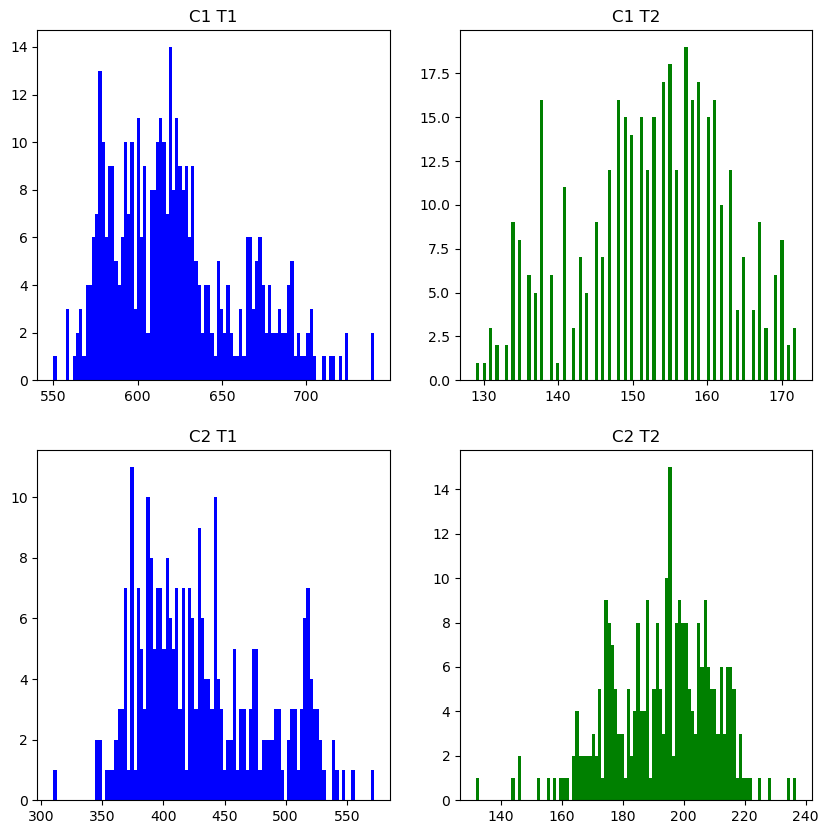

In [68]:
C1 = ROI_WM
C2 = ROI_GM

qC1 = np.argwhere(C1)
qC2 = np.argwhere(C2)

training_data_C1_T1 = ImgT1[qC1[:, 0], qC1[:, 1]]
training_data_C1_T2 = ImgT2[qC1[:, 0], qC1[:, 1]]
training_data_C2_T1 = ImgT1[qC2[:, 0], qC2[:, 1]]
training_data_C2_T2 = ImgT2[qC2[:, 0], qC2[:, 1]]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].hist(training_data_C1_T1, bins=100, color='blue')
axs[0, 0].set_title('C1 T1')
axs[0, 1].hist(training_data_C1_T2, bins=100, color='green')
axs[0, 1].set_title('C1 T2')
axs[1, 0].hist(training_data_C2_T1, bins=100, color='blue')
axs[1, 0].set_title('C2 T1')
axs[1, 1].hist(training_data_C2_T2, bins=100, color='green')
axs[1, 1].set_title('C2 T2')
io.show()

## Exercise 4

In [69]:
X_class1 = np.column_stack((training_data_C1_T1, training_data_C1_T2))  # Class 1 (WM)
X_class2 = np.column_stack((training_data_C2_T1, training_data_C2_T2))  # Class 2 (GM)

# Concatenate to form the full training data vector (X)
X = np.vstack((X_class1, X_class2))

T = np.hstack((np.zeros(len(X_class1)), np.ones(len(X_class2))))

## Exercise 5

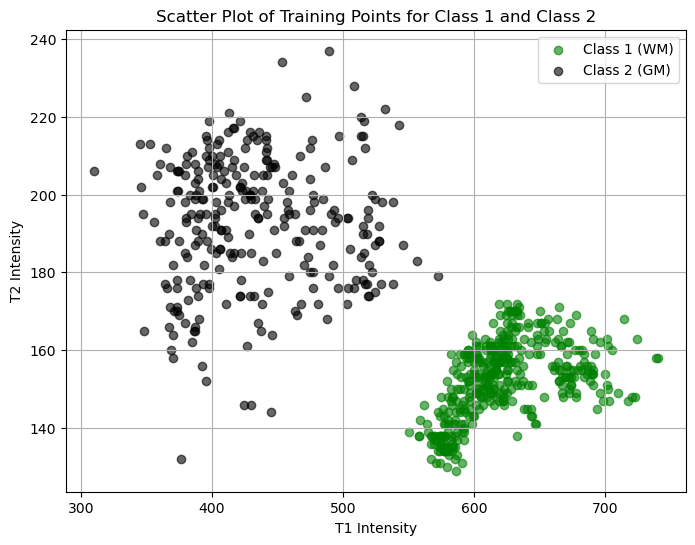

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='green', label='Class 1 (WM)', marker='o', alpha=0.6)
plt.scatter(X_class2[:, 0], X_class2[:, 1], c='black', label='Class 2 (GM)', marker='o', alpha=0.6)

plt.title("Scatter Plot of Training Points for Class 1 and Class 2")
plt.xlabel("T1 Intensity")
plt.ylabel("T2 Intensity")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 6

In [72]:
import LDA 
W = LDA.LDA(X,T)

## Exercise 7

In [73]:
Xall= np.c_[ImgT1.ravel(), ImgT2.ravel()]
Y = np.c_[np.ones((len(Xall), 1)), Xall] @ W.T

## Exercise 8

In [74]:
PosteriorProb = np.clip(np.exp(Y) / np.sum(np.exp(Y),1)[:, np.newaxis], 0, 1)

## Exercise 9

In [85]:
class1_voxels = np.where(PosteriorProb[:, 0] > 0.5)[0]
class2_voxels = np.where(PosteriorProb[:, 0] <= 0.5)[0]

## Exercise 10

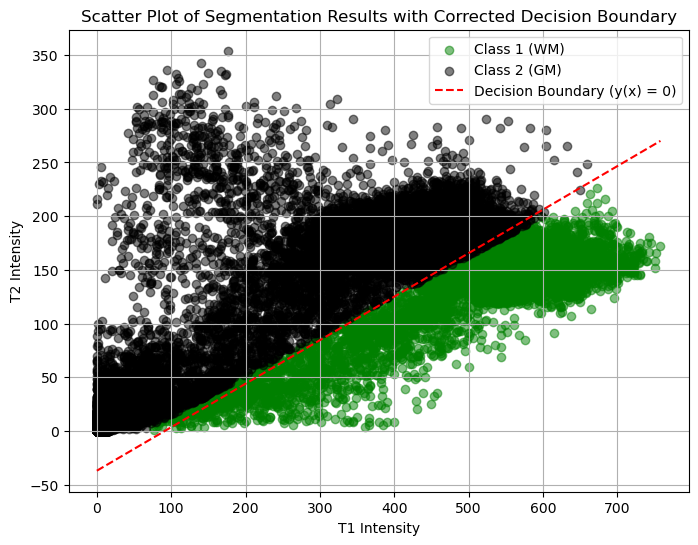

In [97]:
w0, w1, w2 = W[0, 0], W[0, 1], W[0, 2]

# Calculate the slope and intercept for the decision boundary
slope = w1 / w2
intercept = (-w0 / w2) - 240

# Generate x-values and corresponding y-values for the line
x_vals = np.linspace(min(Xall[:, 0]), max(Xall[:, 0]), 100)
y_vals = slope * x_vals + intercept

# Plot the scatter plot with updated decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(Xall[class1_voxels, 0], Xall[class1_voxels, 1], c='green', label='Class 1 (WM)', marker='o', alpha=0.5)
plt.scatter(Xall[class2_voxels, 0], Xall[class2_voxels, 1], c='black', label='Class 2 (GM)', marker='o', alpha=0.5)

# Plot the decision boundary
plt.plot(x_vals, y_vals, color='red', linestyle='--', label="Decision Boundary (y(x) = 0)")

# Add titles and labels
plt.title("Scatter Plot of Segmentation Results with Corrected Decision Boundary")
plt.xlabel("T1 Intensity")
plt.ylabel("T2 Intensity")
plt.legend()
plt.grid(True)
plt.show()

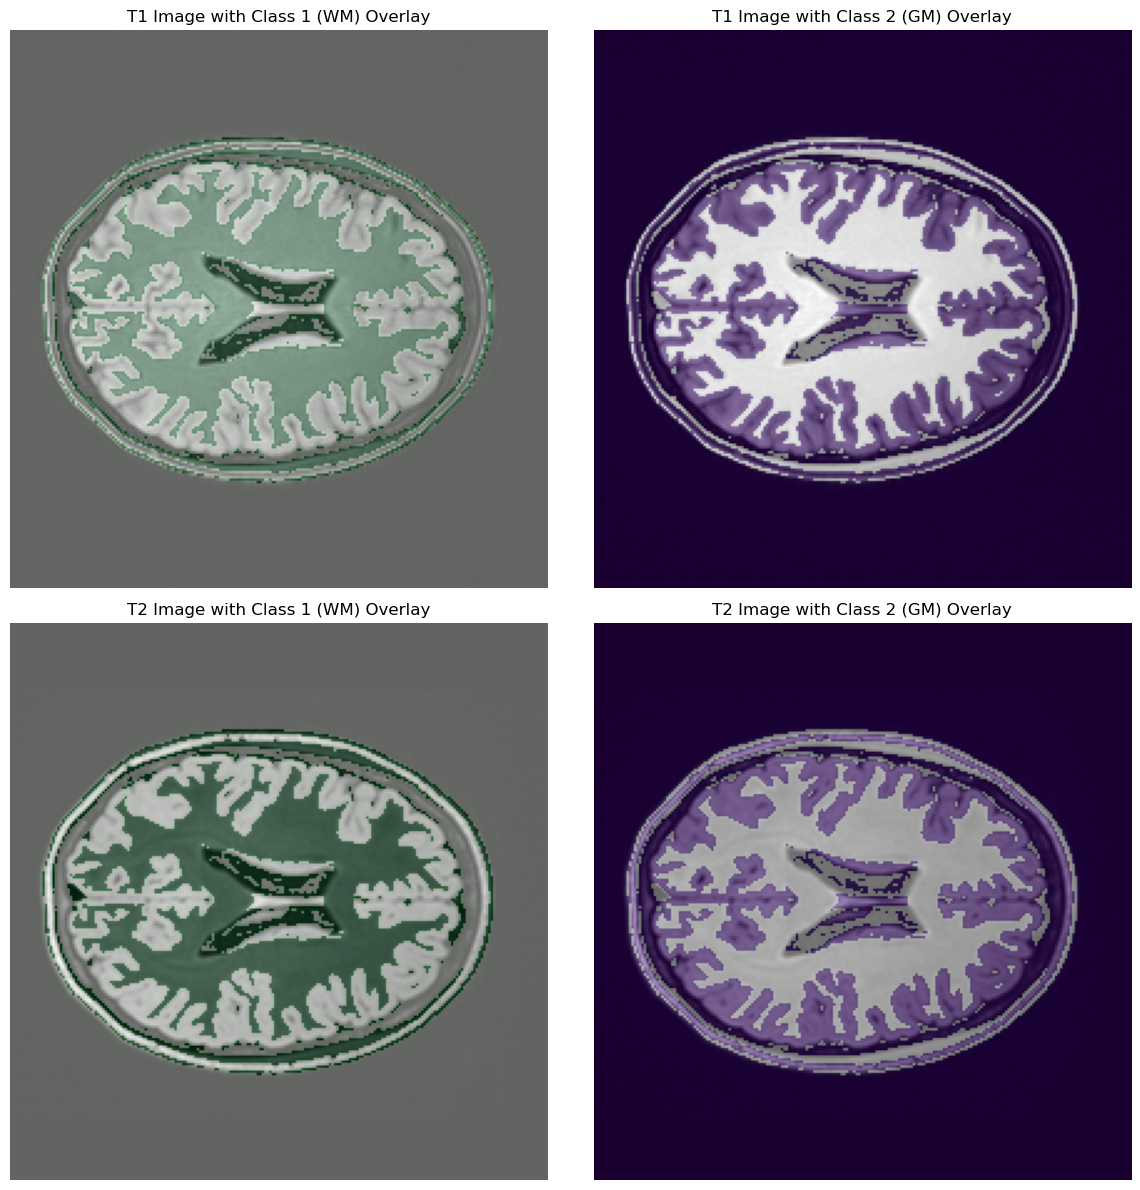

In [99]:
# Reshape the class labels to match the original image shape
segmented_class1 = np.zeros(ImgT1.shape, dtype=int)
segmented_class2 = np.zeros(ImgT2.shape, dtype=int)

# Assign labels based on segmentation
segmented_class1.ravel()[class1_voxels] = 1  # Class 1 (WM)
segmented_class2.ravel()[class2_voxels] = 1  # Class 2 (GM)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# T1 Image with Class 1 (WM) overlay
axes[0, 0].imshow(ImgT1, cmap='gray')
axes[0, 0].imshow(segmented_class1, cmap='Greens', alpha=0.4)  # Green overlay for Class 1 (WM)
axes[0, 0].set_title("T1 Image with Class 1 (WM) Overlay")
axes[0, 0].axis('off')

# T1 Image with Class 2 (GM) overlay
axes[0, 1].imshow(ImgT1, cmap='gray')
axes[0, 1].imshow(segmented_class2, cmap='Purples', alpha=0.4)  # Purple overlay for Class 2 (GM)
axes[0, 1].set_title("T1 Image with Class 2 (GM) Overlay")
axes[0, 1].axis('off')

# T2 Image with Class 1 (WM) overlay
axes[1, 0].imshow(ImgT2, cmap='gray')
axes[1, 0].imshow(segmented_class1, cmap='Greens', alpha=0.4)  # Green overlay for Class 1 (WM)
axes[1, 0].set_title("T2 Image with Class 1 (WM) Overlay")
axes[1, 0].axis('off')

# T2 Image with Class 2 (GM) overlay
axes[1, 1].imshow(ImgT2, cmap='gray')
axes[1, 1].imshow(segmented_class2, cmap='Purples', alpha=0.4)  # Purple overlay for Class 2 (GM)
axes[1, 1].set_title("T2 Image with Class 2 (GM) Overlay")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()